## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [4]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [5]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

_Вывод:_ В данных нет пропущенных значений. В наборе нет категориальных признаков.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.seed())
X_train = X_train[['alcohol', 'magnesium']]
X_test = X_test[['alcohol', 'magnesium']]

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

models = []

models.append(KNeighborsClassifier(n_neighbors=1))
models.append(KNeighborsClassifier(n_neighbors=3))
models.append(KNeighborsClassifier(n_neighbors=5))
models.append(KNeighborsClassifier(n_neighbors=10))
models.append(KNeighborsClassifier(n_neighbors=15))
models.append(KNeighborsClassifier(n_neighbors=25))

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

for model in models:
    model.fit(X_train, y_train)

In [8]:
print('NN', 'Train', 'Test', sep='\t')

for model in models:
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    print(model.n_neighbors,
          '%.2f'%np.mean(predict_train == y_train),
          '%.2f'%np.mean(predict_test == y_test),
          sep='\t')

NN	Train	Test
1	0.99	0.59
3	0.79	0.63
5	0.81	0.63
10	0.73	0.63
15	0.73	0.63
25	0.76	0.67


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [9]:
# !pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [10]:
import mlxtend
from mlxtend.plotting import plot_decision_regions

import matplotlib.gridspec as gridspec
import itertools

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [11]:
def plot_knn(X, y):
    gs = gridspec.GridSpec(2, 3)
    fig = plt.figure(figsize=(16, 9))

    for model, grd in zip(models, itertools.product([0, 1, 2], repeat=2)):
        ax = plt.subplot(gs[grd[0], grd[1]])
        plot_decision_regions(X=X, y=y, clf=model)
        plt.title('NN = ' + str(model.n_neighbors))

    plt.show()

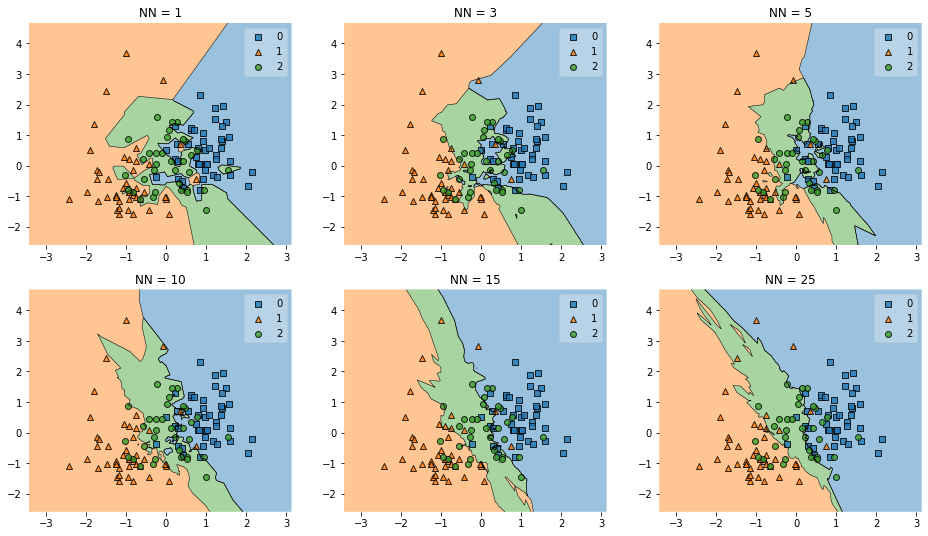

CPU times: user 1min 41s, sys: 1.29 s, total: 1min 42s
Wall time: 1min 42s


In [12]:
%%time
plot_knn(X_train, y_train)

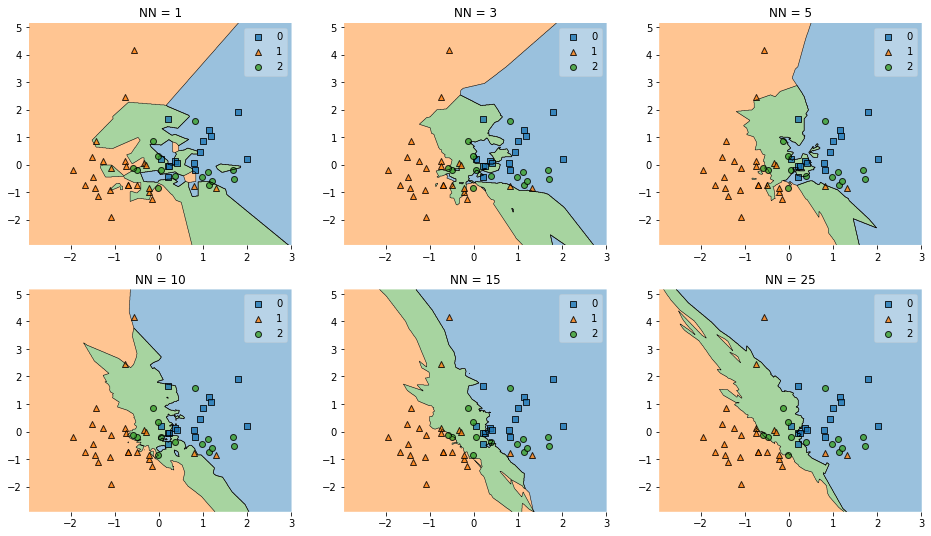

CPU times: user 1min 41s, sys: 1.26 s, total: 1min 43s
Wall time: 1min 43s


In [13]:
%%time
plot_knn(X_test, y_test)

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Наиболее оптимальное количество соседедей — 3.

Если смотреть на решающую поверхность, то можно убедиться, что при слишком маленьких данных появляются артефактные «области», которые захватывают объекты из других категорий. А у слишком большого числа соседей график слишком вытягивается, и не учитывает слишком сильную хаотичность зелёных объектов.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

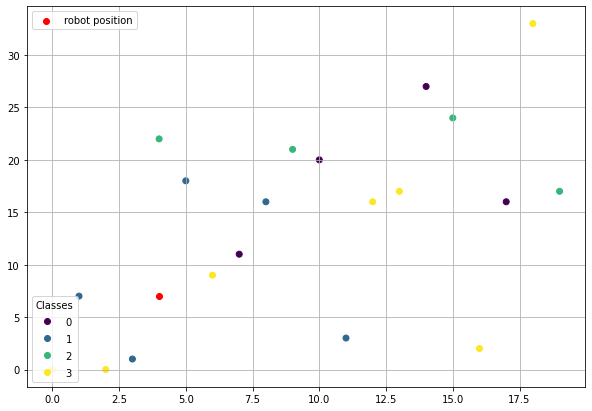

In [14]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = []
        self.trajectory.append(np.array([initial_position]))
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([[1, 0]]), 
                        1: np.array([[-1, 0]]),
                        2: np.array([[0, 1]]),
                        3: np.array([[0, -1]])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        
        if (np.random.binomial(1, .2, 1)[0] == 1):
            result = self.trajectory[len(self.trajectory) - 1] + self.mapping[0]
            self.trajectory.append(result)
            return
        
        movement = self.knn.predict(self.trajectory[len(self.trajectory) - 1])
        result = self.trajectory[len(self.trajectory) - 1] + self.mapping[movement[0]]
        self.trajectory.append(result)

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [17]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = [1, 2, 3, 4], 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    fig, ax = plt.subplots(2, 2, figsize = (16, 10))
    
    for x, y in np.ndindex((2,2)):
        scatter = ax[x, y].scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
        legend1 = ax[x, y].legend(*scatter.legend_elements(),
                            loc="lower left", title="classes")
        ax[x, y].add_artist(legend1)
    
    counter = 0
    for x, y in np.ndindex((2,2)):
        # Conduct experiment
        robot = MobileRobot(k[counter], initial_position, landmarks, classes)

        for n in range(n_movements):
            robot.move()
        
        traj = robot.trajectory
        traj = np.array([i.ravel() for i in traj])
        
        ax[x, y].plot(traj[:, 0], traj[:, 1], 
                   c = 'r', marker = 'o', label = 'robot position')
        
        counter += 1

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

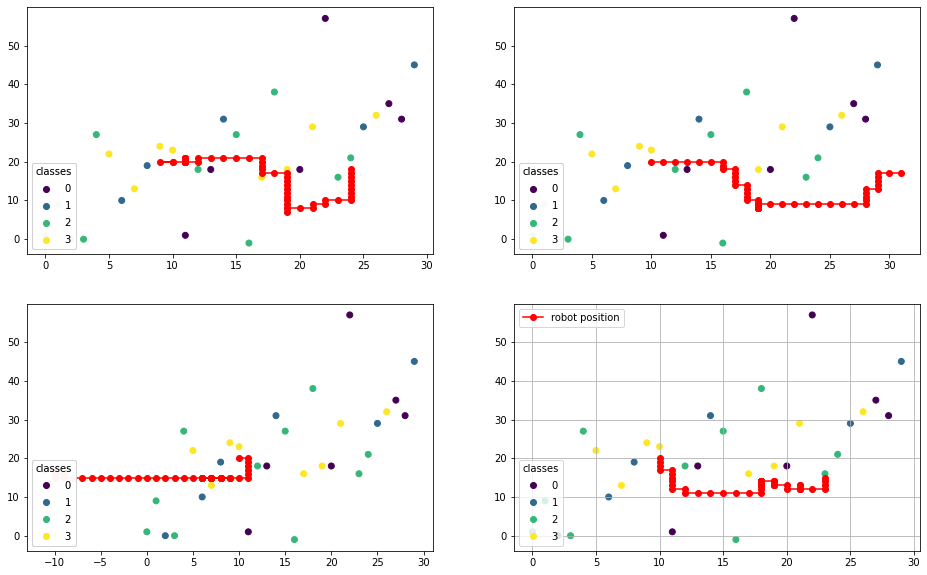

In [18]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = [1, 3, 6, 10], n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

С увеличением числа соседей траектория движения робота постепенно упрощается и становится более предсказуемой. Если бы классы назначались меткам осмысленно, то можно было бы управлять роботом так, как мы этого хотим.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [20]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [21]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [22]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

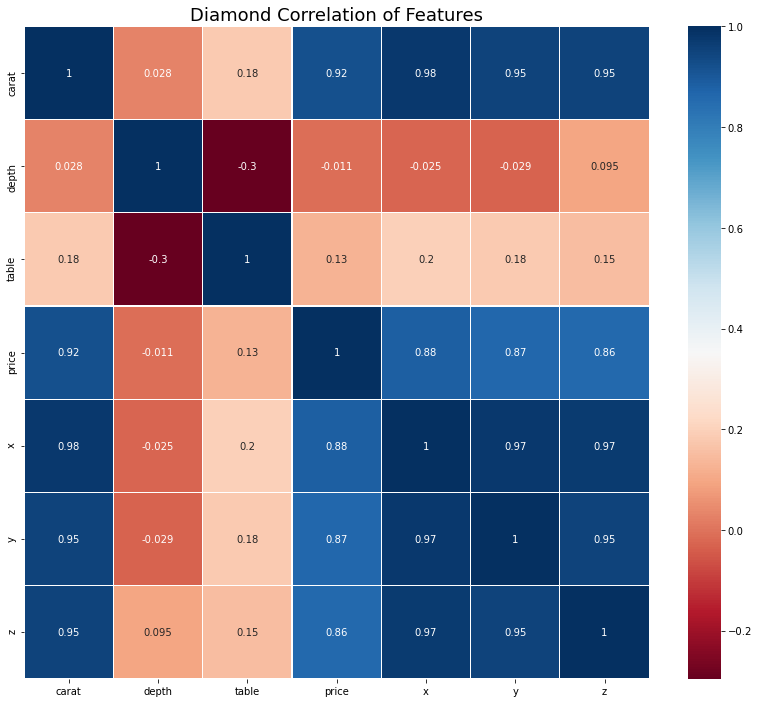

In [23]:
plt.figure(figsize=(14, 12))

plt.title('Diamond Correlation of Features', size=18)
sns.heatmap(data.corr(), cmap=plt.cm.RdBu, linecolor='white',
            linewidths=0.1, annot=True)

plt.show()

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [24]:
data = data.join(pd.get_dummies(data[['cut', 'color', 'clarity']]))

In [25]:
data.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

In [26]:
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [27]:
X = data.drop(['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.seed())

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [28]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [30]:
mean_squared_error(y_train, reg.predict(X_train))

1271274.4280721683

In [31]:
mean_squared_error(y_test, reg.predict(X_test))

1289483.3997007227

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [32]:
reg.coef_

array([5346.64, -90.94, -66.88, -1126.63, -3.73, -33.63, -123.64, -44.37,
       53.11, 15.94, 1.94, 206.36, 157.56, 141.10, 63.44, -125.59,
       -247.39, -392.88, -461.30, 232.32, -145.36, -490.02, 205.04,
       108.09, 245.40, 270.62])

In [33]:
from numpy import linalg as LA
LA.norm(reg.coef_)

5561.2900805833315

Очень большое значение имеет первый по счёту коэффициент. Остальные в пределах нормы.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [34]:
from sklearn import linear_model

In [35]:
lasso = linear_model.Lasso(alpha=10)
lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [36]:
LA.norm(lasso.coef_)

5035.335108129941

In [37]:
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [38]:
LA.norm(ridge.coef_)

5516.329501728914

Вывод. Веса уменьшились не очень сильно в случае Lasso-регрессии и гораздо сильнее в случае Ridge-регрессии. То есть, мультиколлинеальность всё-таки испортила нам результаты в обычной линейной регрессии.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [39]:
alphas = np.array([0.1, 1, 10, 100, 200])

/Users/vakosta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248932059.0875702, tolerance: 60219115.08030729
  model = cd_fast.enet_coordinate_descent(


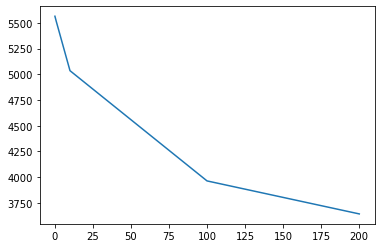

In [40]:
y_alpha = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_alpha.append(LA.norm(lasso.coef_))

plt.plot(alphas, y_alpha)
plt.show()

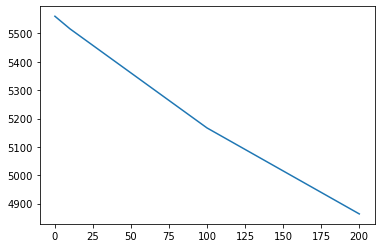

In [41]:
y_alpha = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_alpha.append(LA.norm(ridge.coef_))

plt.plot(alphas, y_alpha)
plt.show()

In [42]:
lasso.coef_

array([3618.00, -0.00, -0.00, 0.00, 0.00, 0.00, -0.00, -0.00, 0.00, -0.00,
       -0.00, 0.00, 0.00, 0.00, 0.00, -0.00, -0.97, -126.93, -257.77,
       0.00, -74.19, -285.46, 0.00, 0.00, 0.00, 14.96])

Lasso-регрессия более эффективно уменьшает веса. Lasso-регрессию можно применять для отбора признаков, потому что она зануляет наименее важные признаки, и оставляет ненулевые коэффициенты у более важных. Этот эффект можно заметить в ячейке выше.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [43]:
from sklearn.linear_model import LassoCV

lcv = LassoCV(alphas=alphas, cv=5)
lcv.fit(X, y)

/Users/vakosta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106870637.53797913, tolerance: 85847313.5517396
  model = cd_fast.enet_coordinate_descent(


LassoCV(alphas=array([0.10, 1.00, 10.00, 100.00, 200.00]), cv=5)

In [44]:
lcv.alphas_

array([200.00, 100.00, 10.00, 1.00, 0.10])

In [45]:
lcv.mse_path_.mean(axis=1)

array([6355129.91, 5561640.41, 2701122.30, 2290357.94, 2241896.83])

Лучшее качество достигается при $\alpha = 0.1$.

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [46]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

/Users/vakosta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248932059.0875702, tolerance: 60219115.08030729
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [47]:
lasso.coef_

array([5342.03, -90.60, -66.74, -1122.24, -3.53, -33.79, -129.80, -54.76,
       35.31, 0.00, -13.12, 274.57, 237.06, 219.81, 147.32, -50.79,
       -185.00, -346.11, -494.75, 181.58, -266.46, -596.54, 103.08,
       -10.92, 173.99, 188.28])

In [48]:
data.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

Ниже я укажу наиболее влиятельные параметры и, наоборот, бесполезные. У каждого параметра напишу своё предположение, почему параметр оказался таким.

Наиболее сильное влияние оказывают параметры:
1. *depth* — Это вещественный признак размера алмаза, поэтому он может сильно влиять.
1. *table* — Это вещественный признак размера алмаза, поэтому он может сильно влиять.
1. *color_E* — Вероятно, этот цвет как-то по-особенному влияет на качество алмаза. Например, алмазы с таким цветом обычно хуже любых других, либо лучше.
1. *clarity_SI2* — Это одна из худших категорий "чистоты" алмаза. Если точнее, предпоследняя из самых худших. Она может отрицательно влиять на цену алмаза. Почему другие категории "чистоты" не влияют так же сильно? Моё предположение — именно эта категория характеризует низкое качество алмазов, а с другими всё более неоднозначно. Возможно, есть какая-то фишка с замутнёнными алмазами, поэтому более низкие категории не являются однозначно дешёвыми. Также мы не можем сказать про чистые алмазы, что они однозначно дорогие.

Никакого влияния не оказывают параметры:
1. *cut_Ideal* — Идеальное качество огранки может означать как настоящий очень дорогой алмаз, так и дешёвую подделку.
1. *color_F* — Какой-то цвет, который встречается и у дорогих, и у дешёвых алмазов.
1. *clarity_VS2* — Средняя категория "чистоты" алмаза. Тут всё понятно: так как она средняя, то и попасть под эту категорию могут алмазы любой цены.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [49]:
mse_reg = mean_squared_error(y_test, reg.predict(X_test))
mse_reg

1289483.3997007227

In [50]:
mse_lasso = mean_squared_error(y_test, lasso.predict(X_test))
mse_lasso

1289317.2988790802

In [51]:
mse_reg - mse_lasso

166.10082164243795

Lasso-регрессия показала себя лучше на тестовой выборке, но незначительно. Разница, на самом деле, довольно небольшая, но всё-таки есть. В данной задаче лучше использовать Lasso-регрессию.

Такой результат мог получиться по двум причинам:
1. Lasso-регрессия лучше показывает себя с сильно зависимыми друг от друга признаками.
1. Мы подобрали идеальный $\alpha$ коэффикиент с помощью LassoCV.